**Import Modules**

In [57]:
import os
import pickle
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
import librosa
import librosa.display
from IPython.display import Audio
import warnings

warnings.filterwarnings('ignore')

**Load the Dataset**

In [58]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/home/yusuf/Workspace/ML Projects/Speech_Emotion_Recognition/speech emotion'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [59]:
paths[:5]

['/home/yusuf/Workspace/ML Projects/Speech_Emotion_Recognition/speech emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_room_disgust.wav',
 '/home/yusuf/Workspace/ML Projects/Speech_Emotion_Recognition/speech emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_pool_disgust.wav',
 '/home/yusuf/Workspace/ML Projects/Speech_Emotion_Recognition/speech emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_mode_disgust.wav',
 '/home/yusuf/Workspace/ML Projects/Speech_Emotion_Recognition/speech emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_boat_disgust.wav',
 '/home/yusuf/Workspace/ML Projects/Speech_Emotion_Recognition/speech emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_time_disgust.wav']

In [60]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [61]:
df = pd.DataFrame({
    'speech': paths,
    'label': labels
})

df.head()

,speech,label
0,/home/yusuf/Workspace/ML Projects/Speech_Emoti...,disgust
1,/home/yusuf/Workspace/ML Projects/Speech_Emoti...,disgust
2,/home/yusuf/Workspace/ML Projects/Speech_Emoti...,disgust
3,/home/yusuf/Workspace/ML Projects/Speech_Emoti...,disgust
4,/home/yusuf/Workspace/ML Projects/Speech_Emoti...,disgust


In [62]:
df['label'].value_counts()

label
disgust    800
fear       800
ps         800
happy      800
sad        800
neutral    800
angry      800
Name: count, dtype: int64

**EDA**

<Axes: xlabel='count', ylabel='label'>

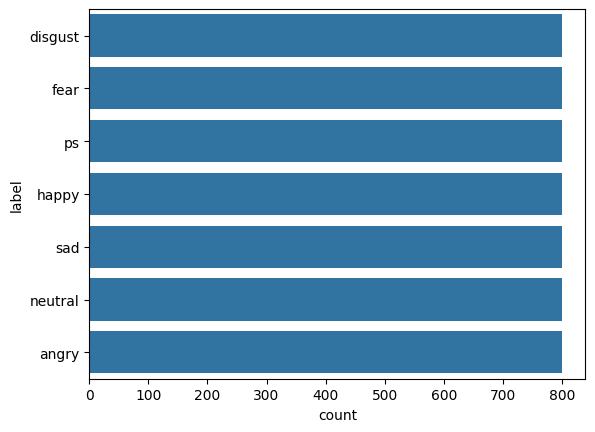

In [63]:
sns.countplot(df['label'])

In [64]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10.5,4))
    plt.title(emotion)
    librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

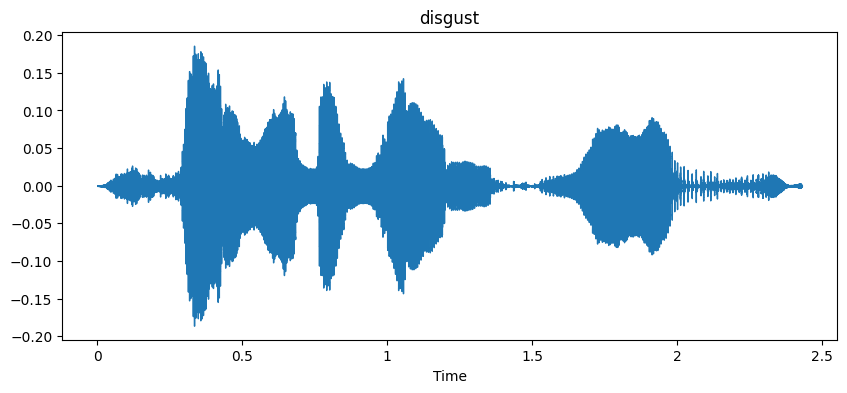

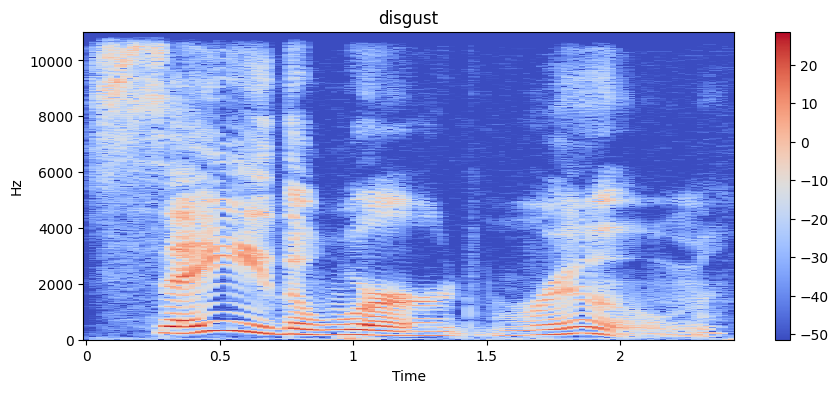

In [65]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

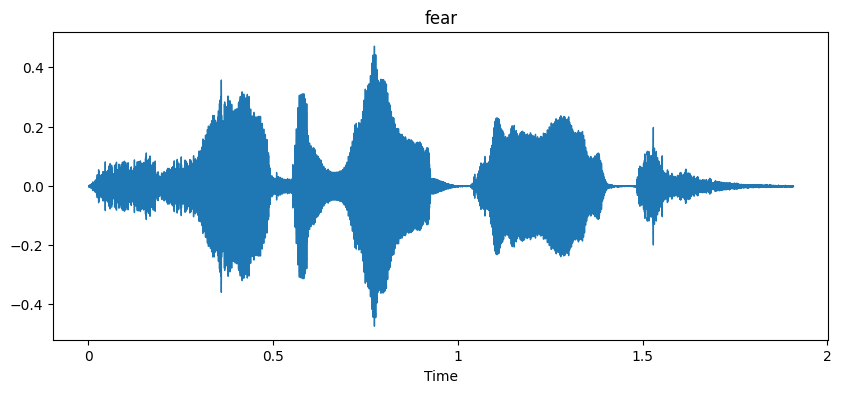

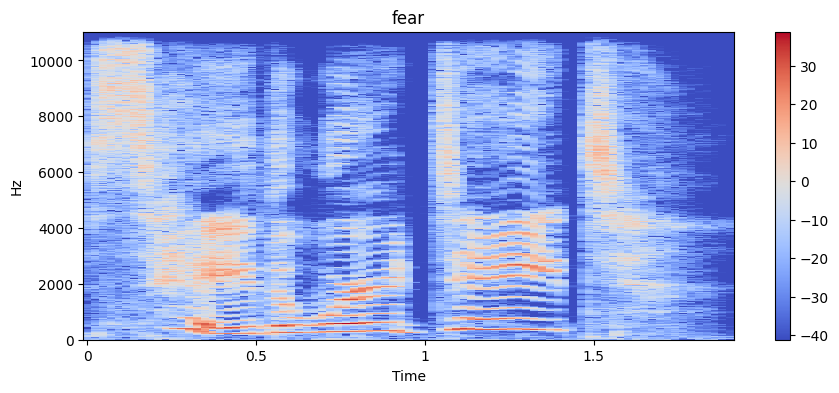

In [66]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

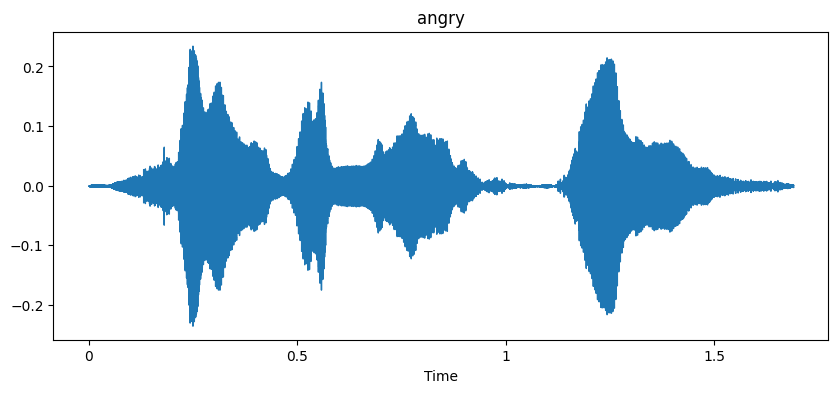

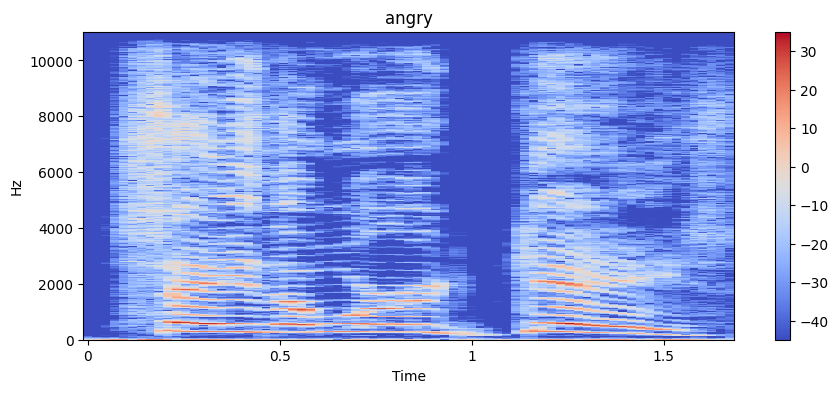

In [67]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

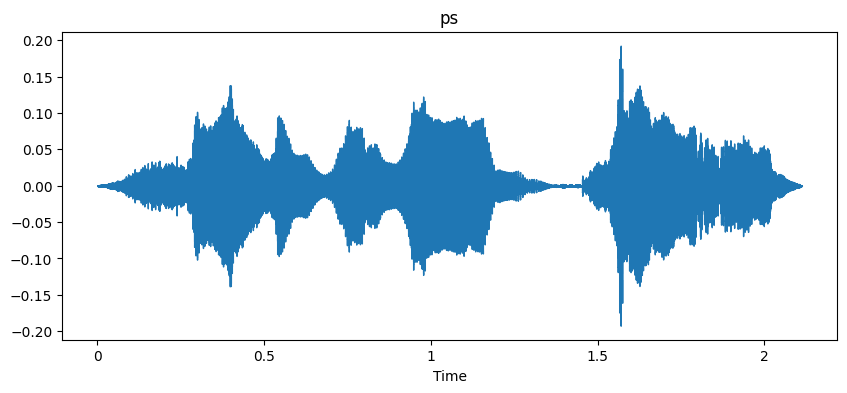

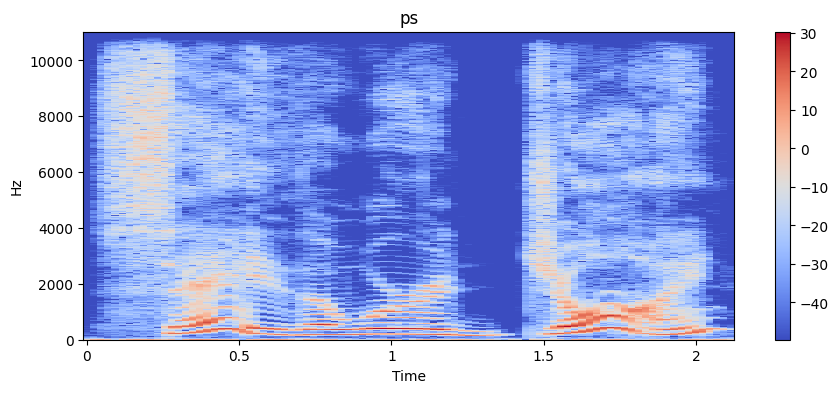

In [68]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

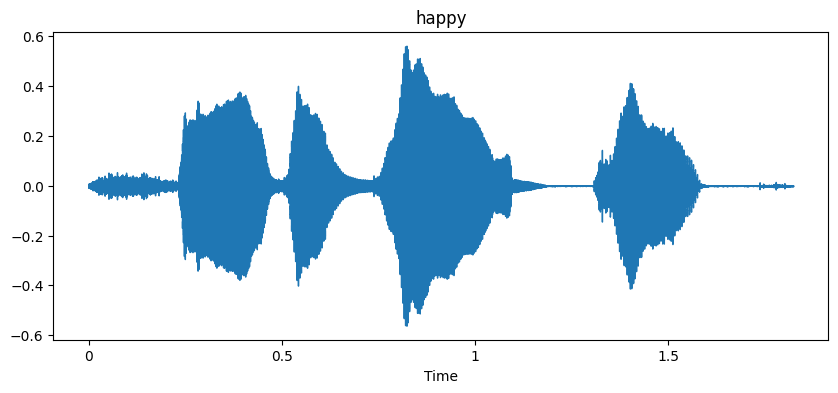

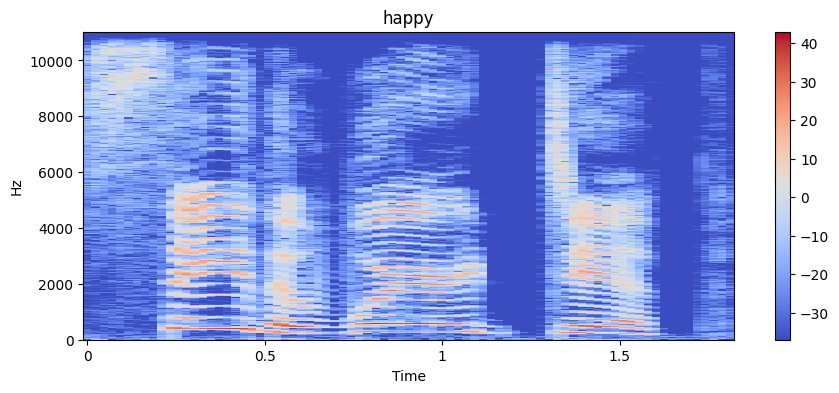

In [69]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

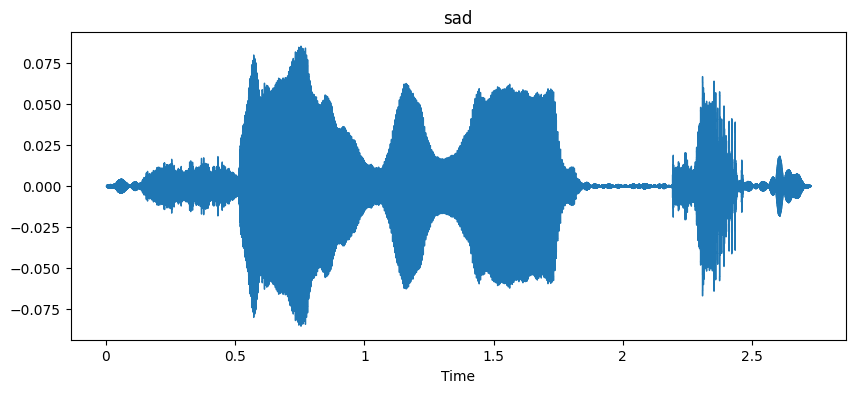

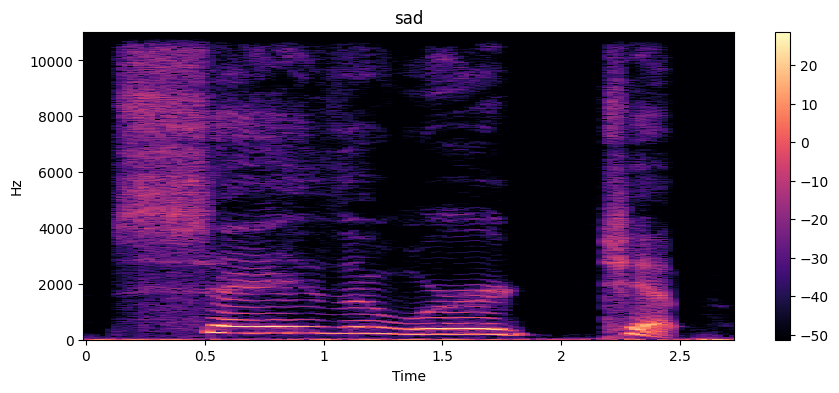

In [70]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

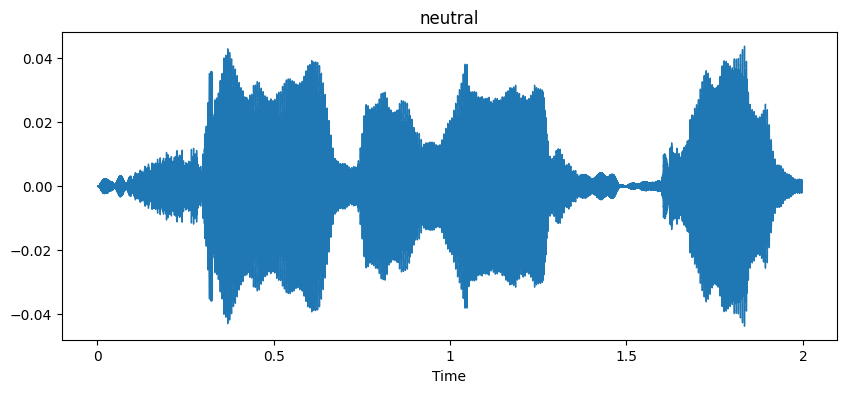

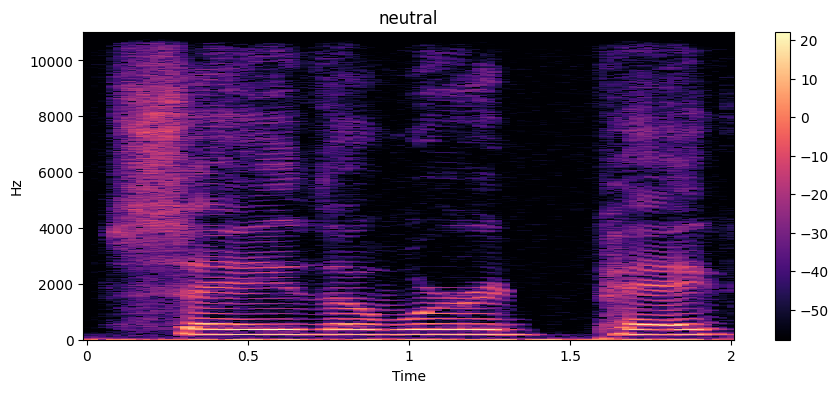

In [71]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]

data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [72]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [73]:
extract_mfcc(df['speech'][0])

array([-4.1664328e+02,  1.2702665e+02, -1.9755976e+00,  7.2985864e+00,
       -1.4281004e+01,  1.0966288e+01, -2.8840847e+00, -3.0953808e+01,
       -2.7229009e+00, -9.4478369e+00, -8.1794767e+00,  7.2811663e-01,
       -1.3298494e+01,  4.9554582e+00, -8.9674234e+00, -7.4612951e-01,
       -1.2113321e+00, -5.1707125e+00, -3.6009593e+00, -5.2464652e+00,
       -4.3622074e+00, -4.2974246e-01, -9.8978882e+00,  2.7961037e+00,
       -5.7773657e+00, -3.2114320e+00, -1.7793356e+00, -7.1963549e-01,
       -1.8533825e+00,  4.5357490e+00, -3.9208386e+00,  2.7333369e+00,
       -2.6149130e-01,  5.6545115e-01,  2.4320979e+00,  2.4181235e+00,
        8.0065117e+00,  6.6572433e+00,  3.8140495e+00,  5.6051888e+00],
      dtype=float32)

In [74]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-416.64328, 127.02665, -1.9755976, 7.2985864,...
1       [-395.3159, 112.56256, 4.2662883, 15.009792, -...
2       [-398.76727, 115.85433, -2.0679271, 6.3423576,...
3       [-420.64407, 97.25092, -0.5822765, 17.940107, ...
4       [-422.95895, 97.47822, -10.138104, 19.302214, ...
                              ...                        
5595    [-309.6931, 24.4093, 5.113555, 14.042371, -29....
5596    [-341.3802, 82.700516, -11.303543, 10.139759, ...
5597    [-354.0923, 19.060642, -0.93356454, 16.293133,...
5598    [-337.37106, 79.9122, -8.179245, -6.7097063, -...
5599    [-338.45972, 54.70133, -5.067722, 2.71302, -36...
Name: speech, Length: 5600, dtype: object

In [75]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [76]:
#input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [77]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])

In [78]:
y = y.toarray()

In [79]:
y.shape

(5600, 7)

**Create LSTM Model**

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape = (40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
#model training 
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1867 - loss: 1.8421 - val_accuracy: 0.2071 - val_loss: 1.7123
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.3542 - loss: 1.6391 - val_accuracy: 0.4277 - val_loss: 1.4179
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5120 - loss: 1.3574 - val_accuracy: 0.5813 - val_loss: 1.1082
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6644 - loss: 0.9665 - val_accuracy: 0.7536 - val_loss: 0.6873
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7604 - loss: 0.7014 - val_accuracy: 0.8830 - val_loss: 0.4228
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8420 - loss: 0.4984 - val_accuracy: 0.9214 - val_loss: 0.2785
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9023 - loss: 0.3390 - val_accuracy: 0.9393 - val_loss: 0.1860
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9334 - loss: 0.2372 - val_accuracy: 0.9384 - val_loss: 0.1848
Epoc

**Plot the Results**

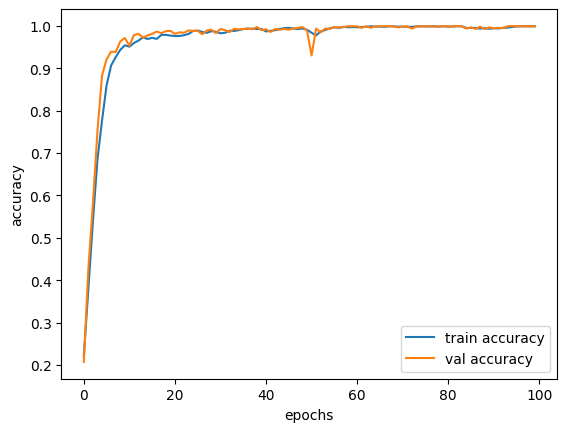

In [83]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

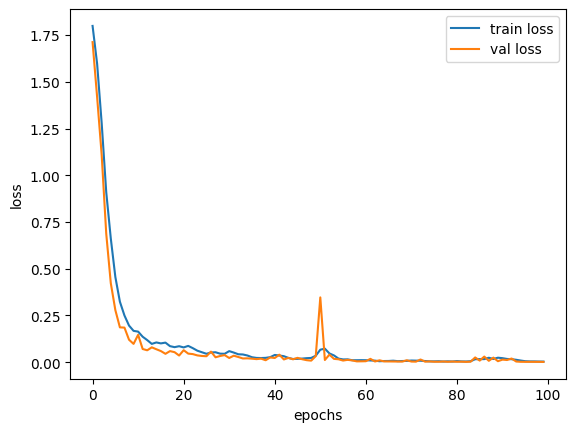

In [84]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()